In [1]:
import os

# 현재 작업 디렉토리 출력
print(os.getcwd())

# 작업 디렉토리 변경, 작업자 환경에 맞게 경로 수정
os.chdir('./sweetpepper')

# 변경된 디렉토리 확인
print(os.getcwd())

/home/ghpf/Yoon/2023 sep. 비SCI/Computer vision/Data
/home/ghpf/Yoon/2023 sep. 비SCI/Computer vision/Data/sweetpepper


In [11]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import webcolors

def closest_color(rgb):
    min_colors = {}
    for key, name in webcolors.CSS3_HEX_TO_NAMES.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - rgb[0]) ** 2
        gd = (g_c - rgb[1]) ** 2
        bd = (b_c - rgb[2]) ** 2
        min_colors[(rd + gd + bd)] = name
    return min_colors[min(min_colors.keys())]

# 이미지 불러오기
img_path = './sweetpepper/sweetpepper.png'
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

# 빨간색과 녹색의 HSV 범위 정의
lower_red = np.array([0, 50, 50])
upper_red = np.array([10, 255, 255])
lower_green = np.array([35, 50, 50])
upper_green = np.array([85, 255, 255])

red_mask = cv2.inRange(img_hsv, lower_red, upper_red)
green_mask = cv2.inRange(img_hsv, lower_green, upper_green)
combined_mask = red_mask | green_mask

selected_pixels = img_rgb[combined_mask == 255]

# 이미지 리쉐이프
pixels = selected_pixels.reshape((-1, 3))

# 찾을 클러스터(색상) 수 정의
num_colors = 2  # 여기에 기록된 숫자만큼의 주요 색상을 찾음

# K-means 클러스터링 수행
kmeans = KMeans(n_clusters=num_colors, n_init=10)
kmeans.fit(pixels)

# 클러스터 센터의 RGB 값을 가져오고 색상 비율 계산
colors = kmeans.cluster_centers_
colors_percentage = np.bincount(kmeans.labels_) / len(kmeans.labels_) * 100

# 클러스터 식별, RGB 값, 백분율 및 색상 이름 출력
for idx, (color, percentage) in enumerate(zip(colors, colors_percentage)):
    color_name = closest_color(color.astype(int))
    print(f"cluster {idx + 1} RGB: {color.astype(int)}, 백분율: {percentage:.2f}%, 색상 이름: {color_name}")



cluster 1 RGB: [98 35 19], 백분율: 43.68%, 색상 이름: maroon
cluster 2 RGB: [181  37  25], 백분율: 56.32%, 색상 이름: firebrick


/tmp/ipykernel_2643156/2123154945.py:58: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 15


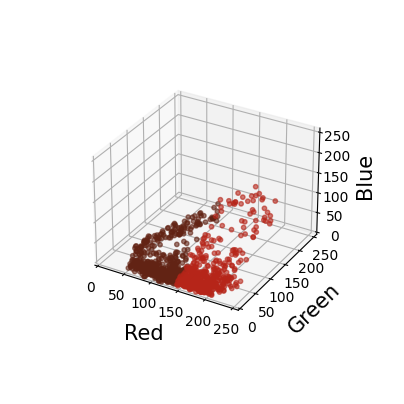

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import webcolors

def closest_color(rgb):
    min_colors = {}
    for key, name in webcolors.CSS3_HEX_TO_NAMES.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - rgb[0]) ** 2
        gd = (g_c - rgb[1]) ** 2
        bd = (b_c - rgb[2]) ** 2
        min_colors[(rd + gd + bd)] = name
    return min_colors[min(min_colors.keys())]

# 이미지 로드
img_path = './sweetpepper/sweetpepper.png'
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

# 빨간색과 녹색의 HSV 범위 정의
lower_red = np.array([0, 50, 50])
upper_red = np.array([10, 255, 255])
lower_green = np.array([35, 50, 50])
upper_green = np.array([85, 255, 255])

red_mask = cv2.inRange(img_hsv, lower_red, upper_red)
green_mask = cv2.inRange(img_hsv, lower_green, upper_green)
combined_mask = red_mask | green_mask

selected_pixels = img_rgb[combined_mask == 255]

# K-mean 클러스터링 (색상 분류 작업)
num_clusters = 2  #분류를 원하는 주요 색상 숫자 만큼
kmeans = KMeans(n_clusters=num_clusters, n_init=10).fit(selected_pixels)

colors = []
for label in np.unique(kmeans.labels_):
    mean_color = np.mean(selected_pixels[kmeans.labels_ == label], axis=0)
    colors.append(mean_color)
colors = np.array(colors)

# 3D 산점도 그리기
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.grid(True)
ax.axis('on')

# 축 한계범위 설정
ax.set_xlim([0, 255])
ax.set_ylim([0, 255])
ax.set_zlim([0, 255])


# 카메라와의 거리 조절
ax.dist = 15

#축 라벨 설정
ax.set_xlabel('Red', size=15, labelpad=15)
ax.set_ylabel('Green', size=15, labelpad=15)
# z축 라벨을 수직으로 설정
ax.zaxis.set_rotate_label(False)
ax.set_zlabel('Blue', size=15, rotation=90, labelpad=10)


unique_labels = np.unique(kmeans.labels_)
sample_size = min(500, len(selected_pixels) // 10)

for label in unique_labels:
    cluster_pixels = selected_pixels[kmeans.labels_ == label]
    indices = np.random.choice(cluster_pixels.shape[0], sample_size, replace=False)
    ax.scatter(cluster_pixels[indices, 0], cluster_pixels[indices, 1], cluster_pixels[indices, 2], 
               color=colors[label] / 255, s=10, alpha=0.6)

plt.tight_layout()
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.1, top=0.9)  

# 그림 저장
plt.savefig('sweetpepper_3dscatter.png', dpi=300)
plt.show()



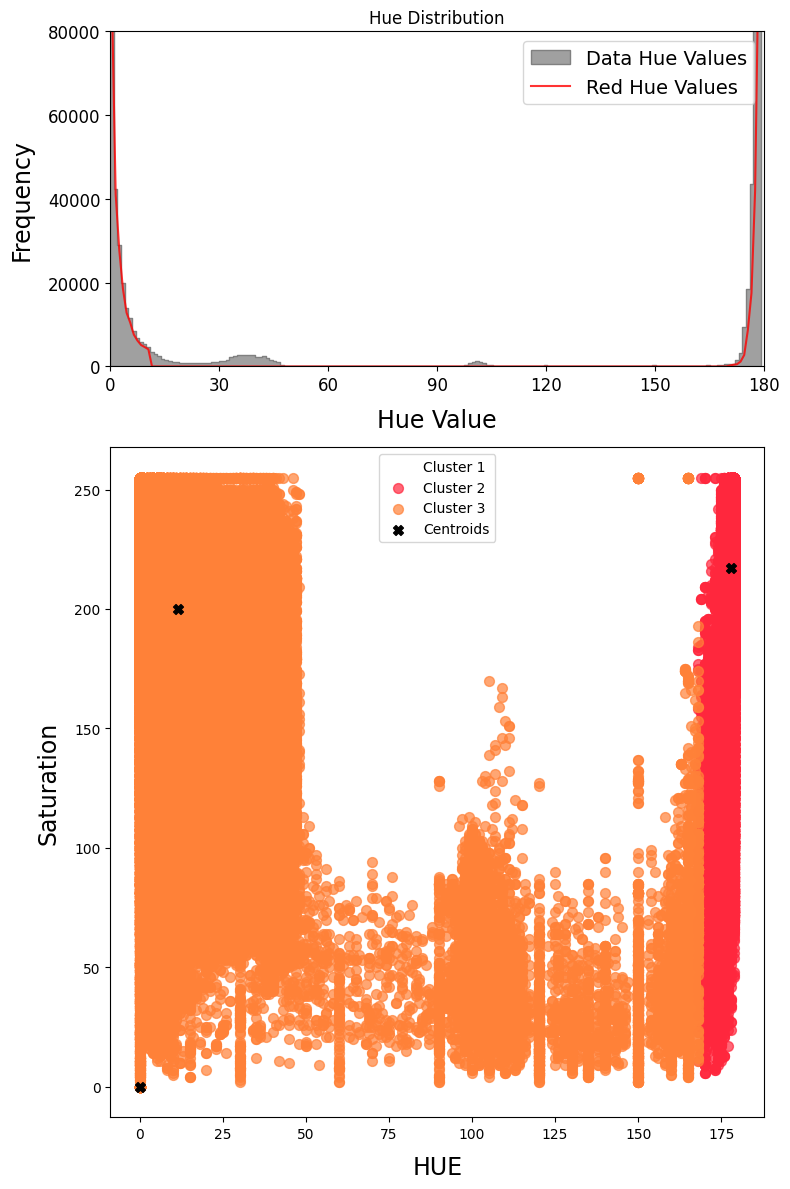

In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import seaborn as sns

# 이미지 로드, 작업자 환경에 맞게 경로 수정
img_path = './sweetpepper/sweetpepper.png'
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)


# 이미지에서 빨간색 마스크 생성
lower_red1 = np.array([0, 50, 50])
upper_red1 = np.array([10, 255, 255])
mask_red1 = cv2.inRange(img_hsv, lower_red1, upper_red1)

lower_red2 = np.array([170, 50, 50])
upper_red2 = np.array([180, 255, 255])
mask_red2 = cv2.inRange(img_hsv, lower_red2, upper_red2)

red_mask = mask_red1 + mask_red2
red_hue = img_hsv[red_mask > 0, 0]

# Hue와 Saturation이 모두 0인 픽셀 제거
mask = (img_hsv[:, :, 0] != 0) | (img_hsv[:, :, 1] != 0)
filtered_pixels = img_rgb[mask]

# 이미지 형태 변환
pixels = img_hsv.reshape((-1, 3))

# 클러스터(색상)의 수 정의
num_colors = 3

# pixels는 hue와 saturation 값을 포함하는 리스트라고 가정합니다.
filtered_pixels = [pixel for pixel in pixels if not (pixel[0] == 0 and pixel[1] == 0)]

filtered_pixels = []
filtered_labels = []

for i, pixel in enumerate(pixels):
    if not (pixel[0] == 0 and pixel[1] == 0):  # hue와 saturation 값이 모두 0이 아닌 경우만 추가
        filtered_pixels.append(pixel)
        filtered_labels.append(gmm_labels[i])


# 클러스터 중심의 명도(V component)가 낮은 클러스터를 필터링
valid_clusters = [i for i in range(num_colors) if gmm_centers[i, 2] > SOME_THRESHOLD]
filtered_pixels = [pixel for i, pixel in enumerate(pixels) if gmm_labels[i] in valid_clusters]
filtered_labels = [label for label in gmm_labels if label in valid_clusters]
# 그래프 만들기
fig, (ax_top, ax_main) = plt.subplots(2, 1, figsize=(8, 12), gridspec_kw={'height_ratios': [2, 4]})

# HSV 클러스터 값을 RGB로 변환하여 시각화
hsv_clusters = np.zeros((num_colors, 3))
hsv_clusters[:, 0] = gmm_centers[:, 0]
hsv_clusters[:, 1] = gmm_centers[:, 1]
hsv_clusters[:, 2] = 255  # set V component to maximum for brightest color
rgb_clusters = cv2.cvtColor(np.uint8([hsv_clusters]), cv2.COLOR_HSV2RGB)[0]

# 메인 피규어: 산점도 생성
for i in range(num_colors):
    cluster_color = rgb_clusters[i] / 255  # normalize to [0, 1]
    ax_main.scatter(pixels[gmm_labels == i][:, 0], pixels[gmm_labels == i][:, 1], s=50, color=cluster_color, alpha=0.7, label=f'Cluster {i+1}')
ax_main.scatter(gmm_centers[:, 0], gmm_centers[:, 1], s=50, c='black', marker='X', label='Centroids')
ax_main.set_xlabel('HUE', size=17, labelpad=10)
ax_main.set_ylabel('Saturation', size=17, labelpad=10)
ax_main.legend()

# 히스토그램 데이터 추출
hist_data, bin_edges = np.histogram(red_hue, bins=180, range=(0,180))

# Convert bin edges to bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Top plot: Color distribution
hue_values = img_hsv[mask][:, 0]

# 휴 값
sns.histplot(hue_values, ax=ax_top, color='gray', bins=180, label='Data Hue Values', element="step", zorder=2)

# 빨간색 휴 값
sns.lineplot(x=bin_centers, y=hist_data, ax=ax_top, color='Red', label='Red Hue Values', alpha=0.8)

# 틱 사이즈, 축 간격 조정
ax_top.tick_params(axis='both', which='major', labelsize=12)
ax_top.set_xlabel('Hue Value', fontsize=17, labelpad=10)
ax_top.set_ylabel('Frequency', fontsize=17, labelpad=10)
ax_top.set_xlim([0, 180])
ax_top.set_ylim([0, 80000])
ax_top.set_xticks(np.arange(0, 181, 30))
ax_top.set_yticks(np.arange(0, 80001, 20000))
ax_top.set_title('Hue Distribution')
ax_top.legend(fontsize=14)
plt.tight_layout()

#이미지 저장
#plt.savefig('HUEdistribution.png', dpi=500, bbox_inches='tight')

#이미지 보여주기
plt.show()

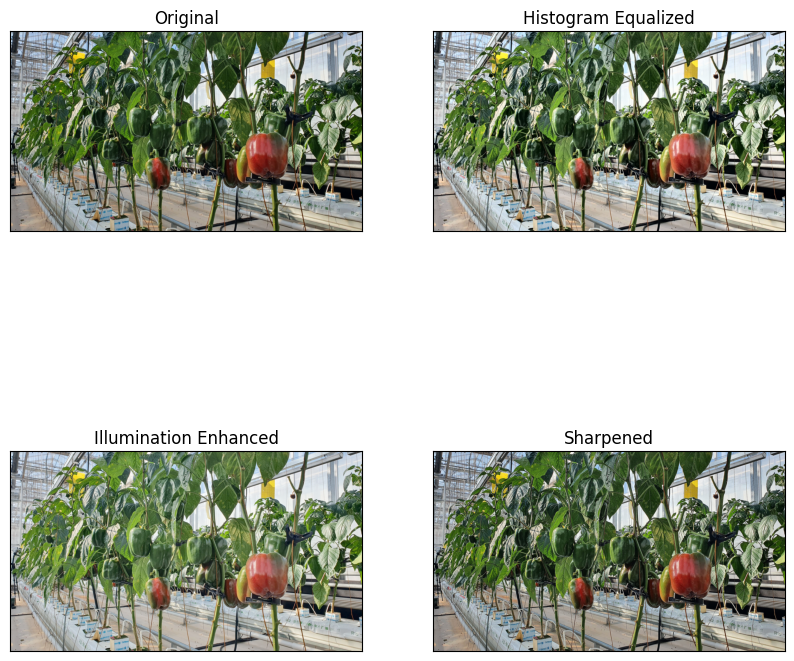

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

# 이미지 불러오기
img_path = './sweetpepper/sweetpepper_enhancement.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 원본 이미지에서 조명 보강하기
img_illuminated = adjust_gamma(img, 1.5)

# 원본 이미지에서 히스토그램 평탄화하기
yuv = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
yuv[:,:,0] = cv2.equalizeHist(yuv[:,:,0])
img_eq = cv2.cvtColor(yuv, cv2.COLOR_YUV2RGB)

# 원본 이미지에서 샤프닝하기
kernel = np.array([[0, -2, 0], 
                   [-2, 9, -2], 
                   [0, -2, 0]])

# 샤프닝 적용
img_sharp = cv2.filter2D(img, -1, kernel)

# 결과 이미지 보여주기
fig, axs = plt.subplots(2, 2, figsize=(10,10))  # 2x2 그리드로 변경

axs[0, 0].imshow(img)
axs[0, 0].set_title('Original')
axs[0, 0].set_xticks([])  # x축 tick 제거
axs[0, 0].set_yticks([])  # y축 tick 제거

axs[0, 1].imshow(img_eq)
axs[0, 1].set_title('Histogram Equalized')
axs[0, 1].set_xticks([])  # x축 tick 제거
axs[0, 1].set_yticks([])  # y축 tick 제거

axs[1, 0].imshow(img_illuminated)
axs[1, 0].set_title('Illumination Enhanced')
axs[1, 0].set_xticks([])  # x축 tick 제거
axs[1, 0].set_yticks([])  # y축 tick 제거

axs[1, 1].imshow(img_sharp)
axs[1, 1].set_title('Sharpened')
axs[1, 1].set_xticks([])  # x축 tick 제거
axs[1, 1].set_yticks([])  # y축 tick 제거

for ax in axs.flat:
    ax.label_outer()
plt.savefig("sweetpepper_enhancement_result.png", bbox_inches = 'tight', dpi=300)
plt.show()
